In [12]:
#imports for creating baseline model and evaluating it
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 
data = pd.read_csv('datasets/ny_hp_cleaned.csv')

In [13]:
# preparing for ols model with all features as a baseline model
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
data.columns

Index(['price', 'lot_size', 'waterfront', 'age', 'land_value', 'new_construct',
       'central_air', 'fuel_type', 'heat_type', 'sewer_type', 'living_area',
       'pct_college', 'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'test'],
      dtype='object')

In [ ]:
# all features ols model
model_bm = ols('price ~ lot_size + waterfront + age + land_value + new_construct + central_air + fuel_type + heat_type + sewer_type + living_area + pct_college + bedrooms + fireplaces + bathrooms + rooms + test', data=data)
model_bm = model_bm.fit()
model_bm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:34:35   Log-Likelihood:                -21402.
No. Observations:                1728   AIC:                         4.284e+04
Df Residuals:                    1708   BIC:                         4.295e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7795.0175   1.96e+04      0.397      0.691   -3.07e+04    4.63e+04
fuel_type[T.Gas]        1.024e+04   1.21e+04      0.844      0.399   -1.36e+04     3.4e+04
fuel_type[T.Oil]        6334.8609   1.29e+04      0.492      0.623   -1.89e+04    3.16e+04
heat_type[T.Hot Air]     643.0045   1.23e+04      0.052      0.958   -2.35e+04    2.48e+04
heat_type[T.Hot Water] -9660.9317   1.28e+04     -0.752      0.452   -3.48e+04    1.55e+04
sewer_type[T.Private]   4320.7460   1.71e+04      0.252      0.801   -2.92e+04    3.79e+04
sewer_type[T.Public]    2875.2122   1.71e+04      0.169      0.866   -3.06e+04    3.63e+04
lot_size                7590.5480   2239.834      3.389      0.001    3197.440     1.2e+04
waterfront              1.203e+05   1.55e+04      7.745      0.000    8.98e+04    1.51e+05
age                     -130.9446     58.353     -2.244      0.025    -245.395     -16.494
land_value                 0.9257      0.048     19.450      0.000       0.832       1.019
new_construct          -4.558e+04   7303.706     -6.240      0.000   -5.99e+04   -3.13e+04
central_air             9951.6923   3476.102      2.863      0.004    3133.826    1.68e+04
living_area               69.7424      4.614     15.115      0.000      60.692      78.792
pct_college             -106.9858    151.385     -0.707      0.480    -403.905     189.933
bedrooms               -7653.6776   2567.954     -2.980      0.003   -1.27e+04   -2617.011
fireplaces              1002.6870   2984.182      0.336      0.737   -4850.349    6855.723
bathrooms                2.32e+04   3368.041      6.887      0.000    1.66e+04    2.98e+04
rooms                   3008.7677    961.363      3.130      0.002    1123.195    4894.340
test                    5627.3008   3246.820      1.733      0.083    -740.861     1.2e+04
==============================================================================
Omnibus:                      598.225   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4840.323
Skew:                           1.394   Prob(JB):                         0.00
Kurtosis:                      10.711   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* fuel_type, heat_type and sewer_type all had high pvalues, as did pct. college and fireplaces
* there is a multicolinearity issue (see correlations heatmap)
* this dataset does strongly predict price, as teh adjsuted R^2 is already quite strong

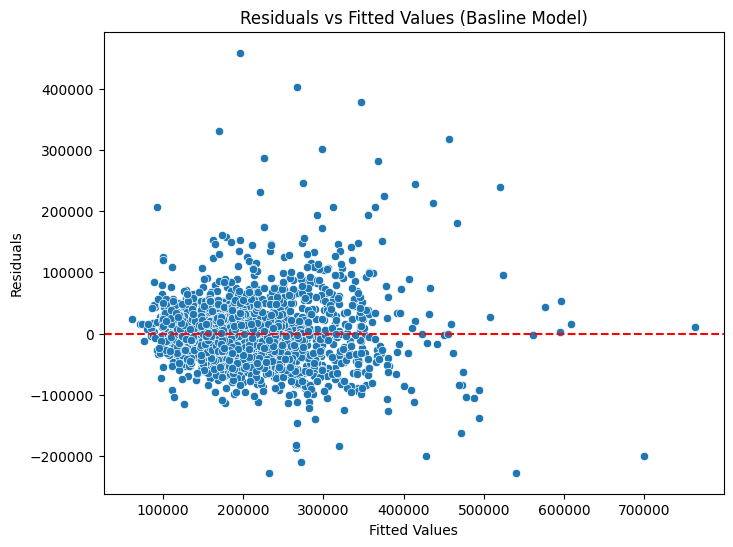

In [ ]:
# residuals plot
residuals = model_bm.resid 
fitted = model_bm.fittedvalues  
plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Basline Model)')
#plt.savefig('plots/baseline_model/residuals_vs_fitted_baseline.png')
plt.show()

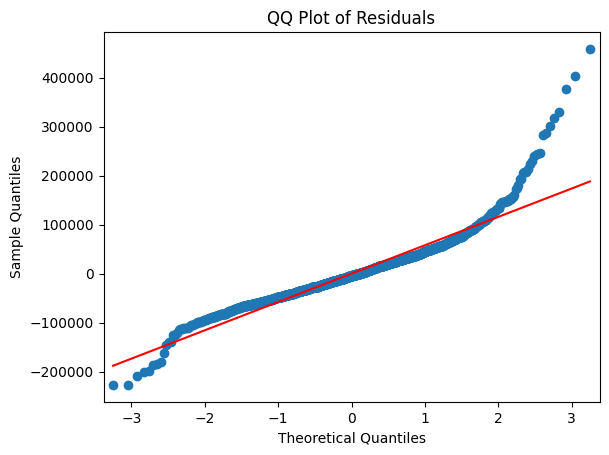

In [ ]:
# normality of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
#plt.savefig('plots/baseline_model/qq_plot_residuals (baseline).png')
plt.show()